In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
birth = pd.read_csv('daily-total-female-births-CA.csv')

In [3]:
birth.head(n=10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


### Converting the data into a series

In [4]:
birth2 = pd.read_csv('daily-total-female-births-CA.csv', index_col = [0], parse_dates = [0], squeeze=True)

In [5]:
birth2.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

In [6]:
type(birth2)

pandas.core.series.Series

In [7]:
type(birth)

pandas.core.frame.DataFrame

In [8]:
series_value =birth2.values
series_value

array([35, 32, 30, 31, 44, 29, 45, 43, 38, 27, 38, 33, 55, 47, 45, 37, 50,
       43, 41, 52, 34, 53, 39, 32, 37, 43, 39, 35, 44, 38, 24, 23, 31, 44,
       38, 50, 38, 51, 31, 31, 51, 36, 45, 51, 34, 52, 47, 45, 46, 39, 48,
       37, 35, 52, 42, 45, 39, 37, 30, 35, 28, 45, 34, 36, 50, 44, 39, 32,
       39, 45, 43, 39, 31, 27, 30, 42, 46, 41, 36, 45, 46, 43, 38, 34, 35,
       56, 36, 32, 50, 41, 39, 41, 47, 34, 36, 33, 35, 38, 38, 34, 53, 34,
       34, 38, 35, 32, 42, 34, 46, 30, 46, 45, 54, 34, 37, 35, 40, 42, 58,
       51, 32, 35, 38, 33, 39, 47, 38, 52, 30, 34, 40, 35, 42, 41, 42, 38,
       24, 34, 43, 36, 55, 41, 45, 41, 37, 43, 39, 33, 43, 40, 38, 45, 46,
       34, 35, 48, 51, 36, 33, 46, 42, 48, 34, 41, 35, 40, 34, 30, 36, 40,
       39, 45, 38, 47, 33, 30, 42, 43, 41, 41, 59, 43, 45, 38, 37, 45, 42,
       57, 46, 51, 41, 47, 26, 35, 44, 41, 42, 36, 45, 45, 45, 47, 38, 42,
       35, 36, 39, 45, 43, 47, 36, 41, 50, 39, 41, 46, 64, 45, 34, 38, 44,
       48, 46, 44, 37, 39

In [9]:
type(series_value)

numpy.ndarray

In [10]:
birth2.size

365

In [11]:
birth2.tail()

date
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, dtype: int64

In [12]:
birth.tail()

,date,births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [13]:
birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [14]:
birth2.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [15]:
birth2 = birth2[0:365]

In [16]:
birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


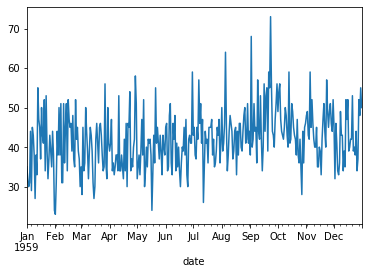

In [17]:
birth2.plot()

#### Moving average

In [18]:
birth_mean = birth.rolling(window = 20).mean()

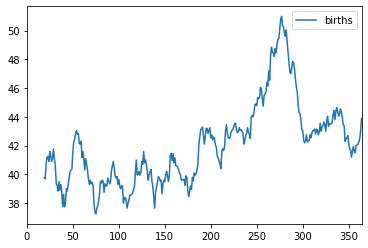

In [19]:
birth_mean.plot()

In [20]:
birth_mean

,births
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
360,42.10
361,42.25
362,42.50
363,43.10


In [21]:
series_value = pd.DataFrame(series_value)

In [22]:
birth_df = pd.concat([series_value, series_value.shift(1)] , axis=1)
# t=t+1

In [23]:

birth_df

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
...,...,...
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0


In [24]:
type(birth_df)

pandas.core.frame.DataFrame

In [25]:
birth_df.columns = ['Actual_birth', 'forecasted_births']

In [26]:
birth_df.head()

,Actual_birth,forecasted_births
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [28]:
birth_df = birth_df[1:]

In [29]:
birth_error = mean_squared_error(birth_df.Actual_birth, birth_df.forecasted_births)

In [30]:
birth_error

84.22252747252747

In [31]:
np.sqrt(birth_error)

9.177283229394606

## ARIMA/ Autoregressive (p) integrated (d) moving average(q)

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

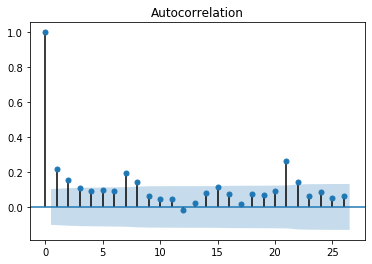

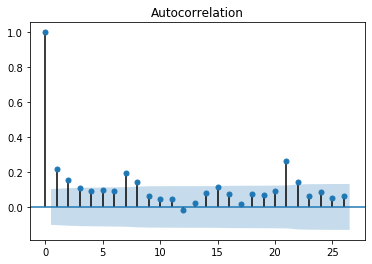

In [33]:
plot_acf(birth2) #to identify q

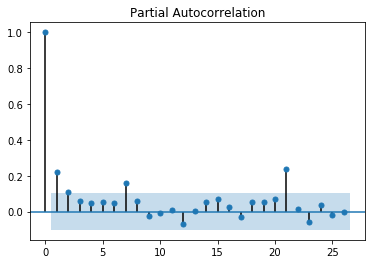

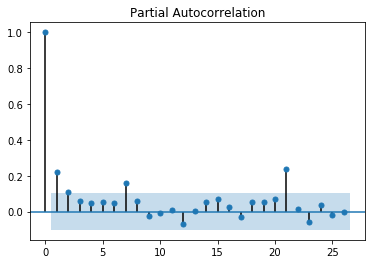

In [34]:
plot_pacf(birth2) #to identify p

In [35]:
 # p = 2,3   d = 0, absq = 3,4
    

In [36]:
birth2.size

365

In [37]:
birth_train = birth2[0:330]
birth_test = birth2[330:365]

In [38]:
birth_train.size

330

In [39]:
birth_test.size

35

In [40]:
from statsmodels.tsa.arima_model import ARIMA

In [41]:
birth_model = ARIMA(birth_train, order=(2,1,3))

/root/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/root/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [42]:
birth_model_fit = birth_model.fit()

In [43]:
birth_model_fit.aic

2230.9482565173735

In [44]:
birth_forecast = birth_model_fit.forecast(steps = 35)[0]

In [45]:
birth_forecast

array([45.30371187, 46.31058822, 43.64950933, 44.59223725, 46.49701678,
       44.34350224, 44.08989889, 46.34387298, 45.07534842, 43.8811155 ,
       45.95213684, 45.69574993, 43.97402737, 45.45675233, 46.10374771,
       44.31137657, 44.99236338, 46.26016596, 44.79347328, 44.66477738,
       46.18571709, 45.30637464, 44.53326779, 45.9467051 , 45.74843182,
       44.60568164, 45.63341254, 46.04983886, 44.84527409, 45.33696923,
       46.18218968, 45.18588041, 45.12986443, 46.15766578, 45.55082642])

In [46]:
birth_test

date
1959-11-27    51
1959-11-28    46
1959-11-29    44
1959-11-30    52
1959-12-01    45
1959-12-02    32
1959-12-03    46
1959-12-04    41
1959-12-05    34
1959-12-06    33
1959-12-07    36
1959-12-08    49
1959-12-09    43
1959-12-10    43
1959-12-11    34
1959-12-12    39
1959-12-13    35
1959-12-14    52
1959-12-15    47
1959-12-16    52
1959-12-17    39
1959-12-18    40
1959-12-19    42
1959-12-20    42
1959-12-21    53
1959-12-22    39
1959-12-23    40
1959-12-24    38
1959-12-25    44
1959-12-26    34
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, dtype: int64

In [47]:
np.sqrt(mean_squared_error(birth_test, birth_forecast))

6.859976705202282

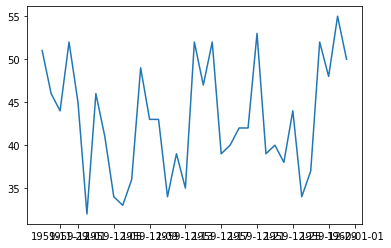

In [48]:
plt.plot(birth_test)
#plt.plot(birth_forecast)

In [49]:
# You can change the order and check the  mse

In [50]:
# You can normalize the data and transform the data

### DATA 2

In [51]:
import pandas as pd
from pandas import datetime

In [52]:
sales = pd.read_csv('/root/git/Time series/supermarket_sales - Sheet1.csv')

In [53]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [54]:
climate = pd.read_csv('/root/git/Time series/DailyDelhiClimateTrain.csv' )

In [55]:
climate.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [56]:
climate.date[1]

'2013-01-02'

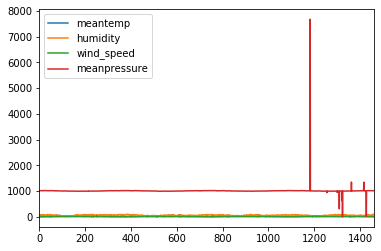

In [57]:
climate.plot()

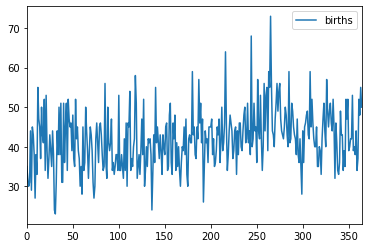

In [58]:
birth.plot()

## Stationarity
means mean, variance and covariance is constant over time

### Converting series to stationary

In [59]:
birth.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [60]:
birth_diff = birth2.diff(periods=1)

In [61]:
birth_diff.head()

date
1959-01-01     NaN
1959-01-02    -3.0
1959-01-03    -2.0
1959-01-04     1.0
1959-01-05    13.0
Name: births, dtype: float64

In [62]:
birth_diff = birth_diff[1:]
# Integrated of order 1, denoted by d (for diff), one of the parameters od ARIMA model
birth_diff

date
1959-01-02    -3.0
1959-01-03    -2.0
1959-01-04     1.0
1959-01-05    13.0
1959-01-06   -15.0
              ... 
1959-12-27     3.0
1959-12-28    15.0
1959-12-29    -4.0
1959-12-30     7.0
1959-12-31    -5.0
Name: births, Length: 364, dtype: float64

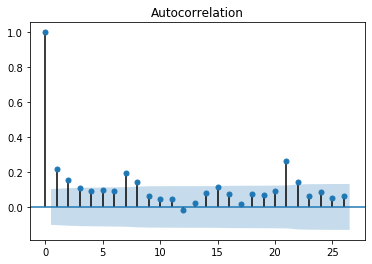

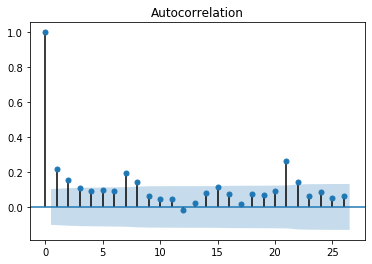

In [63]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(birth2)

In [64]:
birth2.shift(3)

date
1959-01-01     NaN
1959-01-02     NaN
1959-01-03     NaN
1959-01-04    35.0
1959-01-05    32.0
              ... 
1959-12-27    38.0
1959-12-28    44.0
1959-12-29    34.0
1959-12-30    37.0
1959-12-31    52.0
Name: births, Length: 365, dtype: float64

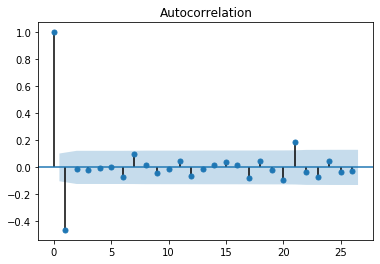

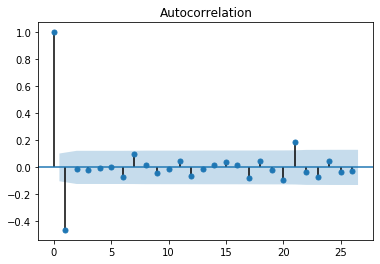

In [65]:
plot_acf(birth_diff)

birth_diff is stationary

## Autoregressive model

In [66]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [67]:
x = birth2.values
x.size

365

In [68]:
train = x[:300]
test = x[300:]

In [69]:
train.size

300

In [70]:
test.shape

(65,)

In [71]:
predictions = []

In [72]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()
#model_ar.fit.aic

In [73]:
pred = model_ar_fit.predict(start=300, end=364)

In [74]:
pred

array([39.02828529, 40.22326796, 40.07542516, 39.67593021, 40.08517897,
       39.97121687, 37.88069917, 38.9641948 , 40.08453026, 40.11100921,
       40.28405341, 41.09547345, 40.92364248, 40.20950409, 40.15630254,
       40.58232808, 40.74523313, 40.80895958, 41.11452911, 41.22796308,
       41.08865384, 41.01181571, 41.09523075, 41.13562383, 41.16663808,
       41.29203707, 41.3986034 , 41.39775548, 41.37328369, 41.39188465,
       41.40772988, 41.41701373, 41.45624765, 41.5080236 , 41.53175568,
       41.53782152, 41.54851774, 41.55660956, 41.55949794, 41.57128547,
       41.59253559, 41.60910095, 41.61855058, 41.62689656, 41.63348145,
       41.63664123, 41.64090501, 41.64880993, 41.65700067, 41.66342765,
       41.66913841, 41.67395455, 41.67696509, 41.67937101, 41.68265598,
       41.68641259, 41.68987685, 41.69314773, 41.6961455 , 41.69841936,
       41.70012528, 41.70182253, 41.70363058, 41.7053905 , 41.70711781])

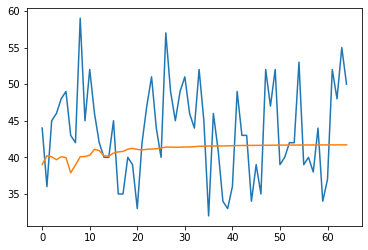

In [75]:
plt.plot(test)
plt.plot(pred)

In [76]:
mean_squared_error(test,pred)

47.20429163885551

In [77]:
comparison = pd.DataFrame(test, pred)
comparison.head(n=3)

,0
39.028285,44
40.223268,36
40.075425,45


In [78]:
comparison.columns = comparison=['actual']

In [79]:
comparison

['actual']

## ARIMA model

In [80]:
from statsmodels.tsa.arima_model import ARIMA

p,d,q

p = periods taken for autoregressive model

d = integrated order, difference

q = periods in moving average model

In [81]:
model_arima = ARIMA(train, order=(4,2,0))
model_arima_fit = model_arima.fit()
model_arima_fit.aic

2199.639472328104

In [82]:
predictions = model_arima_fit.forecast(steps=65)[0]

In [83]:
predictions[0]

27.159289023417035

In [84]:
test.shape

(65,)

In [85]:
predictions.shape

(65,)

In [86]:
mean_squared_error(test,predictions)

19344.18140171803

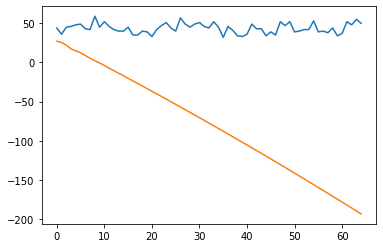

In [87]:
plt.plot(test)
plt.plot(predictions)

In [88]:
import itertools
p =d=q=range(0,10)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [91]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(params, model_arima_fit.aic)
    except:
        continue

In [92]:
import plotly